# 1. Read the CSV File:

Load the provided CSV fie into a pandas DataFrame

In [2]:
import pandas as pd

acc_players_df = pd.read_csv('acc_players-2324F.csv', header=1)

Display the first 5 rows of the DataFrame to understand the structure of the data

In [3]:
acc_players_df.head(5)

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
0,1,Amaree Abram,SO,G,Georgia Tech,10,108,17,11,1,...,9,10,34,0.262,0.318,0.200,0.615,4.1,-0.1,-6.4
1,2,Sola Adebisi,FR,F,Florida State,7,9,1,1,0,...,1,1,2,0.500,0.500,NaN,NaN,3.5,0.0,-6.7
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
3,4,Abe Atiyeh,SR,G,Boston College,4,6,0,0,0,...,1,0,3,0.333,0.000,1.000,NaN,1.1,0.0,-8.2
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18.0,2.9,7.9


# 2. Basic Analysis:

Calculate the total points scored by all players combined

In [4]:
total_points_combined = acc_players_df['PTS'].sum()
total_points_combined

38411

Find the player who has played the most minutes (MP)

In [5]:
most_minutes_player = acc_players_df.loc[acc_players_df['MP'].idxmax()]
most_minutes_player

,135
Rk,136
Player,Casey Morsell
Class,SR
Pos,G
School,NC State
G,41
MP,1333
TRB,114
AST,67
STL,46


Identify the top 5 players in terms of total rebounds (TRB)

In [6]:
top_5_rebounds = acc_players_df[['Player', 'TRB']].sort_values(by='TRB', ascending=False).head(5)
top_5_rebounds

,Player,TRB
5,Armando Bacot,380
178,Ian Schieffelin,340
90,Harrison Ingram,327
44,Mohamed Diarra,311
149,Norchad Omier,309


# 3. Player Filtering:

Create a new DataFrame containing only players who played more than 500 minutes

In [7]:
more_than_500_min_players_df = acc_players_df[acc_players_df['MP'] > 500]
more_than_500_min_players_df.head()

,Rk,Player,Class,Pos,School,G,MP,TRB,AST,STL,...,TOV,PF,PTS,FG%,2P%,3P%,FT%,PER,WS,BPM
2,3,Prince Aligbe,SO,F,Boston College,35,651,119,21,15,...,30,51,164,0.435,0.522,0.147,0.620,9.4,0.9,-1.3
4,5,Zack Austin,JR,F,Pittsburgh,33,746,137,29,32,...,13,35,216,0.417,0.563,0.295,0.737,18.0,2.9,7.9
5,6,Armando Bacot,SR,F,North Carolina,37,1123,380,56,22,...,60,100,538,0.540,0.544,0.400,0.781,24.6,6.1,8.9
7,8,Reece Beekman,SR,G,Virginia,34,1114,124,212,68,...,70,43,486,0.443,0.487,0.310,0.754,23.4,4.9,10.5
9,10,Chris Bell,SO,F,Syracuse,32,865,75,21,18,...,26,58,384,0.434,0.459,0.420,0.842,14.9,2.2,3.3


From this filtered DataFrame, determine the player with the highest total assists (AST)

In [8]:
highest_ast_player = more_than_500_min_players_df.loc[more_than_500_min_players_df['AST'].idxmax()]
highest_ast_player

,7
Rk,8
Player,Reece Beekman
Class,SR
Pos,G
School,Virginia
G,34
MP,1114
TRB,124
AST,212
STL,68


Who are the top 3 Assist Leads in the League?

In [9]:
top_3_assist_leads = more_than_500_min_players_df[['Player', 'AST']].sort_values(by='AST', ascending=False).head(3)
top_3_assist_leads

,Player,AST
7,Reece Beekman,212
215,Jaeden Zackery,152
21,Elliot Cadeau,150


Who are the top 3 Shot Blockers?

In [10]:
top_3_shot_blockers = more_than_500_min_players_df[['Player', 'BLK']].sort_values(by='BLK', ascending=False).head(3)
top_3_shot_blockers

,Player,BLK
51,Ryan Dunn,77
157,Quinten Post,61
5,Armando Bacot,56


# 4. School-Based Analysis

Group the players by School and calculate the total points scored by each school

In [11]:
total_points_by_school = acc_players_df.groupby('School')[['PTS']].sum().reset_index()
total_points_by_school.head()

,School,PTS
0,Boston College,2667
1,Clemson,2785
2,Duke,2830
3,Florida State,2526
4,Georgia Tech,2272


Group the players by School and calculate the total assists (AST) for each team

In [12]:
total_assists_by_school = acc_players_df.groupby('School')[['AST']].sum().reset_index()
total_assists_by_school.head()

,School,AST
0,Boston College,509
1,Clemson,533
2,Duke,551
3,Florida State,406
4,Georgia Tech,425


Sort the schools by total points scored and display the top 3 schools

In [13]:
total_points_by_school = total_points_by_school.sort_values(by='PTS', ascending=False)
total_points_by_school.head(3)

,School,PTS
7,NC State,3101
8,North Carolina,3032
2,Duke,2830


# 5. Extra Credit (Bonus)

Create a bar chart showing the top 5 players by total points scored (PTS)

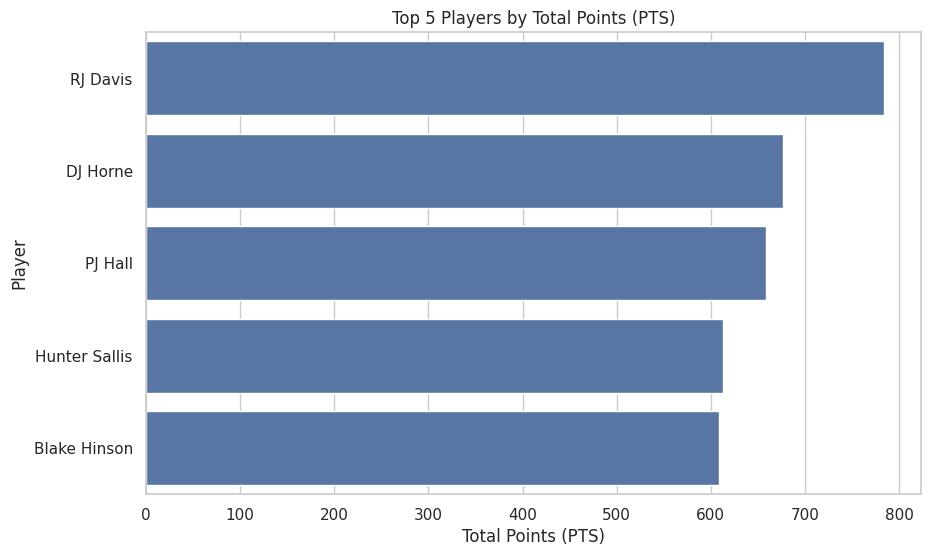

In [14]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Get top 5 players by total points scored (PTS)
top_5_players_PTS = acc_players_df[['Player', 'PTS']].sort_values(by='PTS', ascending=False).head(5)

# Plot a bar chart of the top 5 players by total points scored PTS
plt.figure(figsize=(10,6))
sns.barplot(x='PTS', y='Player', data=top_5_players_PTS)
plt.title('Top 5 Players by Total Points (PTS)')
plt.xlabel('Total Points (PTS)')
plt.ylabel('Player')
plt.show()

Correlation: Investigate whether there is any correlation between a player's field goal percentage (FG%) and their win shares (WS). Provide a scatter plot and calculate the correlation coefficient.

In [15]:
# Calculate the correlation coefficient
correlation_coefficient = acc_players_df['FG%'].corr(acc_players_df['WS'])
correlation_coefficient

0.4210663894199787

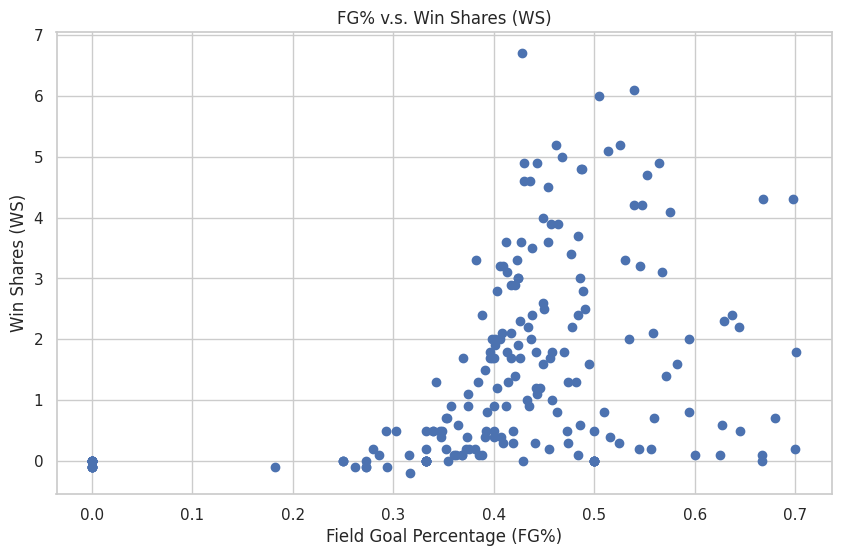

In [16]:
# Provide a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x = acc_players_df['FG%'], y = acc_players_df['WS'])
plt.title('FG% v.s. Win Shares (WS)')
plt.xlabel('Field Goal Percentage (FG%)')
plt.ylabel('Win Shares (WS)')
plt.grid(True)
plt.show()

Based on the scatter plot and the correlation coefficient, 0.4210663894199787, there is a moderate positive correlation between field goal percentage (FG%) and win shares (WS). This means that, generally, as a player's FG% increases, their win shares tend to increase as well, although the relationship is not very strong.

# Reflection

### What did you learn about working with CSV files and pandas DataFrames in this assignment?

In this assignment, I learned how to use the `groupby` function with pandas DataFrames. Specifially, I learned how to group data into categories like `School`. This allowed me to efficiently analyze data, such as finding the total points scored by each school and the total assists for each school team. Understanding grouping will be super helpful for future projects/homeworks where summarizing and comparing data across categories is needed, since grouping makes complex data more manageable.

### What was the most challenging aspect of this assignment, and how did you overcome it?

The most challenging aspect of this assignment was the bonus problem, specifically, creating visualizations like the scatter plot and bar chart. There are so many plotting options in `maplotlib.pyplot` and it was overwhelming to figure out exactly what functions are available to use, such as `.figure()`, `.title()`, `.xlabel()`, `.grid()`, `.show()`, etc. To overcome this problem, I looked up the documentation of the library. This helped me understand what different fuctions are able to be used and how to apply them effectively. Thanks to the documentation, I not only solved the bonus problem, but I learned about a ton of other functions to use in the future.

### How do you think the insights gained from analyzing ACC basketball statistics could be applied to other real-world datasets?


Analyzing the ACC basketball statistics taught me how powerful data analytics can be in uncovering trends. The techniques I used, like grouping and visualizing data, can be applied to other fields, such as identifiying top-selling flavors in an ice cream shop or the worst-selling shoes at a shoe store. This assignment improved my skills in manipulating data, preparing me for the future project in this course where I imagine I will be reading in a data set and finding trends and correlations.